In [1]:
# Bibliotecas necessárias para a realização deste projeto

# Processamento dos dados
import pandas as pd
import numpy as np

# Visualização dos dados
import matplotlib.pyplot as plt
import seaborn as sns

# Modelos e performance
from sklearn.preprocessing import MinMaxScaler #normalização dos dados
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics

# Oversampling e undersampling
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from collections import Counter

# Curva ROC e AUC
from sklearn.metrics import roc_curve, roc_auc_score

# Dataset (informações)

In [2]:
# Upload do nosso dataset

from google.colab import files
uploaded = files.upload()

Saving dataset_bees.csv to dataset_bees.csv


In [3]:
#Informações do Dataset

bees = pd.read_csv('dataset_bees.csv')

bees.columns = ['mntcm', 'mxtwm', 'rfseas', 'tann', 'latitude', 'longitude', 'y']
bees.dropna(inplace=True)
print(bees)
bees.describe()

# As variáveis pertinentes para a distribuição desta espécie são:
#    - a temperatura mínima do mês mais frio (mntcm);
#    - a temperatura máxima do mês de mais quente (mxtwm);
#    - a temperatura média anual (tann);
#    - a sazonalidade da chuva (rfeas);

      mntcm  mxtwm  rfseas  tann  latitude  longitude    y
0       6.0   23.0    36.0  14.0      17.0       51.0  1.0
1       6.0   23.0    35.0  13.0      17.0       52.0  0.0
2       5.0   22.0    35.0  13.0      17.0       53.0  0.0
3       5.0   23.0    35.0  13.0      17.0       54.0  0.0
4       6.0   23.0    34.0  14.0      17.0       56.0  0.0
...     ...    ...     ...   ...       ...        ...  ...
9432    7.0   27.0    76.0  17.0     108.0       77.0  0.0
9433    7.0   27.0    76.0  16.0     108.0       78.0  0.0
9434    5.0   28.0    76.0  15.0     108.0       79.0  0.0
9435    8.0   27.0    76.0  17.0     108.0       80.0  0.0
9436    7.0   27.0    78.0  16.0     109.0       79.0  0.0

[9435 rows x 7 columns]


,mntcm,mxtwm,rfseas,tann,latitude,longitude,y
count,9435.000000,9435.000000,9435.000000,9435.000000,9435.000000,9435.000000,9435.000000
mean,1.580286,28.060519,38.677477,12.766826,56.209327,98.467091,0.013355
std,2.790964,3.897244,14.777344,2.866861,23.231891,36.470145,0.114794
min,-11.000000,10.000000,11.000000,-1.000000,17.000000,32.000000,0.000000
25%,0.000000,25.000000,27.000000,11.000000,36.000000,68.000000,0.000000
50%,1.000000,28.000000,37.000000,13.000000,54.000000,96.000000,0.000000
75%,4.000000,31.000000,51.000000,15.000000,76.000000,126.000000,0.000000
max,8.000000,36.000000,78.000000,18.000000,109.000000,185.000000,1.000000


import numpy as np
from google.colab import autoviz
df_4060711152412877308 = autoviz.get_df('df_4060711152412877308')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_4060711152412877308, *['mntcm'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1556981801136956381 = autoviz.get_df('df_1556981801136956381')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_1556981801136956381, *['mxtwm'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4274319876525761157 = autoviz.get_df('df_4274319876525761157')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_4274319876525761157, *['rfseas'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3495232417545852269 = autoviz.get_df('df_3495232417545852269')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_3495232417545852269, *['tann'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3131408463819272450 = autoviz.get_df('df_3131408463819272450')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_3131408463819272450, *['mntcm'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8136264546628316002 = autoviz.get_df('df_8136264546628316002')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_8136264546628316002, *['mxtwm'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1547695047123657435 = autoviz.get_df('df_1547695047123657435')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_1547695047123657435, *['rfseas'], **{})
chart

import numpy as np
from google.colab import autoviz
df_497856689965989189 = autoviz.get_df('df_497856689965989189')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_497856689965989189, *['tann'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5795276370717032062 = autoviz.get_df('df_5795276370717032062')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_5795276370717032062, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4905117790645752671 = autoviz.get_df('df_4905117790645752671')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_4905117790645752671, *[[['mntcm', 'mxtwm'], ['mxtwm', 'rfseas'], ['rfseas', 'tann'], ['tann', 'latitude']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_286194698164838209 = autoviz.get_df('df_286194698164838209')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_286194698164838209, *['mntcm', 'index'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_8895493522223819370 = autoviz.get_df('df_8895493522223819370')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_8895493522223819370, *['mxtwm', 'index'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_9184477206045843602 = autoviz.get_df('df_9184477206045843602')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_9184477206045843602, *['rfseas', 'index'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_5220519904105580838 = autoviz.get_df('df_5220519904105580838')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_5220519904105580838, *['tann', 'index'], **{'inner': 'stick'})
chart

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


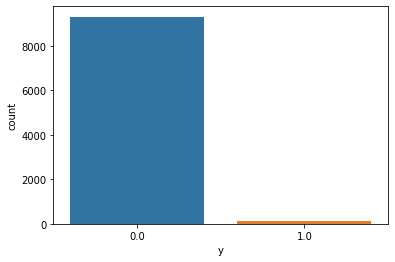

0.0    9309
1.0     126
Name: y, dtype: int64

In [ ]:
sns.countplot(bees['y'],label='count')
plt.show()

bees['y'].value_counts()

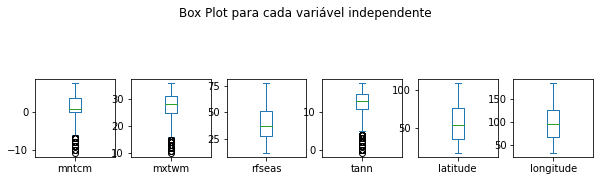

In [ ]:
bees.drop('y', axis=1).plot(kind='box', subplots=True, layout=(6,6),
                            sharex=False, sharey=False, figsize=(10,10),
                            title='Box Plot para cada variável independente')
plt.show()


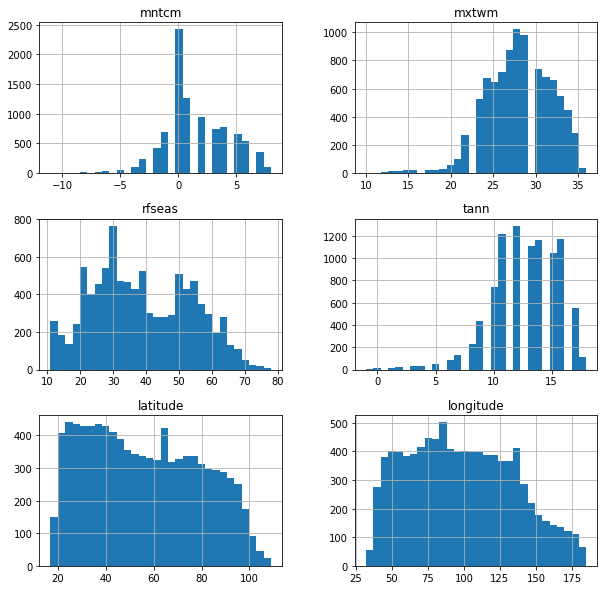

In [ ]:
bees.drop('y' ,axis=1).hist(bins=30, figsize=(10,10))
plt.show()

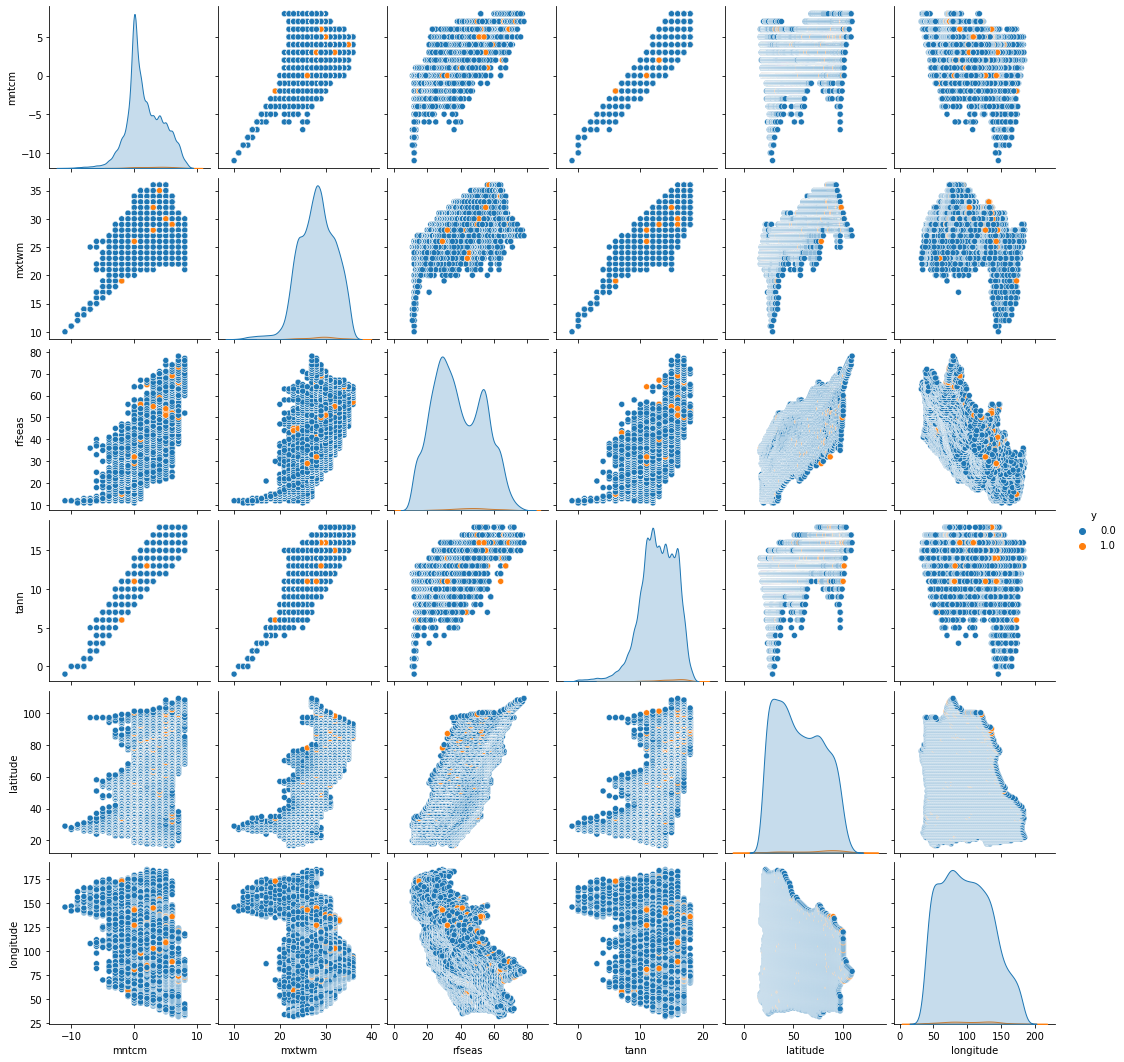

In [ ]:
sns.pairplot(bees,hue='y')

# Train Test Split dos nossos dados



In [ ]:
# Train test split
X = bees.values[:,0:4]
Y = bees.values[:,6]

# Normalização
scaler = MinMaxScaler()
Xscaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(Xscaled, Y, test_size=0.3,
                                                    random_state=0)
print('Número de dados para treino: ', X_train.shape[0])
print('Número de dados para teste:  ', X_test.shape[0])
# Conferir o número de dados do nosso conjunto de treino
# relativos as classes de y (0,1)
print(sorted(Counter(y_train).items()))

Número de dados para treino:  6604
Número de dados para teste:   2831
[(0.0, 6515), (1.0, 89)]


# Baseline

In [ ]:
#--------------------- Treinar o modelo: Random Forest -------------------------
#                               Baseline
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# verificar a performance do modelo
print(classification_report(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred)*100)
#-------------------------------------------------------------------------------

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      2794
         1.0       0.06      0.03      0.04        37

    accuracy                           0.98      2831
   macro avg       0.52      0.51      0.51      2831
weighted avg       0.98      0.98      0.98      2831

Accuracy:  98.19851642529142


# Random Over Sampling


In [ ]:
ros = RandomOverSampler(random_state=0)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

#Verificar o número de registos após over sampling
print(sorted(Counter(y_train_ros).items()))

[(0.0, 6515), (1.0, 6515)]


In [ ]:
#--------------------- Treinar o modelo: Random Forest -------------------------
#                         _ Random Oversampling _
#rf = RandomForestClassifier()
ros_model = rf.fit(X_train_ros, y_train_ros)
y_pred_ros = ros_model.predict(X_test)

# verificar a performance do modelo
print(classification_report(y_test, y_pred_ros))
print("Accuracy: ", accuracy_score(y_test, y_pred_ros)*100)
#-------------------------------------------------------------------------------

              precision    recall  f1-score   support

         0.0       0.99      0.96      0.98      2794
         1.0       0.03      0.08      0.04        37

    accuracy                           0.95      2831
   macro avg       0.51      0.52      0.51      2831
weighted avg       0.98      0.95      0.96      2831

Accuracy:  95.23136700812434


Antes de aplicar oversampling, treinamos o modelo "random forest" para verificar os valores padrão relativamente à precisão e recall (varia entre 0 e 1, onde o 0 representa 0% de taxa de verdadeiro positivo e o 1 representa 100% da taxa de positivo) da classe minoritária. Inicialmente, o resultado obtido indica que a classe minoritária tem um recall de 0.03 - o que é muito baixo.

Após o uso de oversampling podemos reparar que não nos forneceu um resultado muito melhor. Obtemos um recall de 0.08 e a precisão diminuiu. Assim concluimos que o oversampling tem um pior desempenho do que a sua 'baseline'.

# **SMOTE Oversampling** (escolhido de acordo com os resultados)

In [ ]:
#oversampling aleatório para a class minoritária - SMOTE
smote = SMOTE(random_state=0)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

##Verificar o número de registos após oversampling
print(sorted(Counter(y_train_smote).items()))

[(0.0, 6515), (1.0, 6515)]


In [ ]:
#--------------------- Treinar o modelo: Random Forest -------------------------
#                                 _ SMOTE _
#rf = RandomForestClassifier()
smote_model = rf.fit(X_train_smote, y_train_smote)
y_pred_smote = smote_model.predict(X_test)

# verificar a performance do modelo
print(classification_report(y_test, y_pred_smote))
print("Accuracy: ", accuracy_score(y_test, y_pred_smote)*100)
#-------------------------------------------------------------------------------

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      2794
         1.0       0.06      0.05      0.06        37

    accuracy                           0.98      2831
   macro avg       0.52      0.52      0.52      2831
weighted avg       0.98      0.98      0.98      2831

Accuracy:  97.70399152243023


# Random Undersampling


In [ ]:
# Undersampling aleatório para a class maioritária
rus = RandomUnderSampler(random_state=0)
X_train_rus, y_train_rus= rus.fit_resample(X_train, y_train)

# Verificar o número de registos após random oversampling
print(sorted(Counter(y_train_rus).items()))

[(0.0, 89), (1.0, 89)]


In [ ]:
#--------------------- Treinar o modelo: Random Forest -------------------------
#                         _ Random Undersampling _

#rf = RandomForestClassifier()
rus_model = rf.fit(X_train_rus, y_train_rus)
y_pred_rus = rus_model.predict(X_test)

# verificar a performance do modelo
print(classification_report(y_test, y_pred_rus))
print("Accuracy: ", accuracy_score(y_test, y_pred_rus)*100)

#-------------------------------------------------------------------------------

              precision    recall  f1-score   support

         0.0       0.99      0.69      0.81      2794
         1.0       0.03      0.62      0.05        37

    accuracy                           0.69      2831
   macro avg       0.51      0.66      0.43      2831
weighted avg       0.98      0.69      0.80      2831

Accuracy:  68.8802543270929


# UnderSampling com a utilização do NearMiss

In [ ]:
# Undersampling aleatório para a class maioritária - NearMiss
nearmiss = NearMiss(version=3)
X_train_nearmiss, y_train_nearmiss= nearmiss.fit_resample(X_train, y_train)

# Verificar o número de registos após undersampling (NearMiss)
print(sorted(Counter(y_train_nearmiss).items()))

[(0.0, 89), (1.0, 89)]


In [ ]:
#--------------------- Treinar o modelo: Random Forest -------------------------
#                       _ Undersampling com NearMiss_

#rf = RandomForestClassifier()
nearmiss_model = rf.fit(X_train_nearmiss, y_train_nearmiss)
y_pred_nearmiss = nearmiss_model.predict(X_test)

# verificar a performance do modelo
print(classification_report(y_test, y_pred_nearmiss))
print("Accuracy: ", accuracy_score(y_test, y_pred_nearmiss)*100)

#-------------------------------------------------------------------------------

              precision    recall  f1-score   support

         0.0       0.99      0.36      0.53      2794
         1.0       0.01      0.68      0.03        37

    accuracy                           0.37      2831
   macro avg       0.50      0.52      0.28      2831
weighted avg       0.98      0.37      0.53      2831

Accuracy:  36.877428470505116


# **Treino dos classificadores e a sua avaliação**

In [ ]:
#--------------------- Treinar o modelo: Random Forest -------------------------

rf = RandomForestClassifier()
rf.fit(X_train_smote, y_train_smote)
y_pred_1 = rf.predict(X_test)

# verificar a performance do modelo
print(classification_report(y_test, y_pred_1))
print("Accuracy: ", accuracy_score(y_test, y_pred_1)*100)
#-------------------------------------------------------------------------------

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      2794
         1.0       0.08      0.08      0.08        37

    accuracy                           0.98      2831
   macro avg       0.53      0.53      0.53      2831
weighted avg       0.98      0.98      0.98      2831

Accuracy:  97.59802190038856


In [ ]:
#---------------- Treinar o modelo: Vizinhos mais próximos ---------------------

knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_smote, y_train_smote)
y_pred_2 = knn.predict(X_test)

# verificar a performance do modelo
print(classification_report(y_test, y_pred_2))
print("Accuracy: ", accuracy_score(y_test, y_pred_2)*100)
#-------------------------------------------------------------------------------

              precision    recall  f1-score   support

         0.0       0.99      0.89      0.94      2794
         1.0       0.05      0.46      0.09        37

    accuracy                           0.89      2831
   macro avg       0.52      0.68      0.52      2831
weighted avg       0.98      0.89      0.93      2831

Accuracy:  88.51995761215117


In [ ]:
#------------------ Treinar o modelo: Multi Layer Perceptron -------------------

clf = MLPClassifier(hidden_layer_sizes=(150,100,50),
                        max_iter = 300,activation = 'relu',
                        solver = 'adam')
clf.fit(X_train_smote, y_train_smote)
y_pred_3 = clf.predict(X_test)

# verificar a performance do modelo
print(classification_report(y_test, y_pred_smote))
print("Accuracy: ", accuracy_score(y_test, y_pred_3)*100)
#-------------------------------------------------------------------------------

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      2794
         1.0       0.06      0.05      0.06        37

    accuracy                           0.98      2831
   macro avg       0.52      0.52      0.52      2831
weighted avg       0.98      0.98      0.98      2831

Accuracy:  78.17025785941364


In [ ]:
#------------------ Treinar o modelo: Árvores de Decisão -----------------------

clf_gini = DecisionTreeClassifier()
clf_gini.fit(X_train_smote, y_train_smote)
y_pred_4 = clf_gini.predict(X_test)

# verificar a performance do modelo
print(classification_report(y_test, y_pred_4))
print("Accuracy: ", accuracy_score(y_test, y_pred_4)*100)
#-------------------------------------------------------------------------------

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      2794
         1.0       0.07      0.08      0.08        37

    accuracy                           0.97      2831
   macro avg       0.53      0.53      0.53      2831
weighted avg       0.98      0.97      0.98      2831

Accuracy:  97.42140586365242


In [ ]:
#-------------- Treinar o modelo: Máquinas de Vetores de Suporte ---------------

mvs = SVC(kernel='linear', random_state=0)
mvs.fit(X_train_smote, y_train_smote)
y_pred_5 = mvs.predict(X_test)

# verificar a performance do modelo
print(classification_report(y_test, y_pred_5))
print("Accuracy: ", accuracy_score(y_test, y_pred_5)*100)
#-------------------------------------------------------------------------------

              precision    recall  f1-score   support

         0.0       0.99      0.60      0.75      2794
         1.0       0.02      0.62      0.04        37

    accuracy                           0.60      2831
   macro avg       0.51      0.61      0.39      2831
weighted avg       0.98      0.60      0.74      2831

Accuracy:  60.22606852702226


In [ ]:
#------------------- Treinar o modelo: Regressão Logísitca ---------------------

log_regression = LogisticRegression()
log_regression.fit(X_train_smote, y_train_smote)
y_pred_6 = log_regression.predict(X_test)

# verificar a performance do modelo
print(classification_report(y_test, y_pred_6))
print("Accuracy: ", accuracy_score(y_test, y_pred_6)*100)
#-------------------------------------------------------------------------------

              precision    recall  f1-score   support

         0.0       0.99      0.64      0.78      2794
         1.0       0.02      0.62      0.04        37

    accuracy                           0.64      2831
   macro avg       0.51      0.63      0.41      2831
weighted avg       0.98      0.64      0.77      2831

Accuracy:  63.68774284705051


# **Curva ROC e AUC**

Random Forest AUC          -> 0.5344560738261526
Nearest Neighbour AUC      -> 0.6751484842036023
Multi Layer Perceptron AUC -> 0.6893874905685929
Decision Tree AUC          -> 0.5335612993093308
SVM AUC                    -> 0.6118129582696511
Logistic Regression AUC    -> 0.6293505387993577



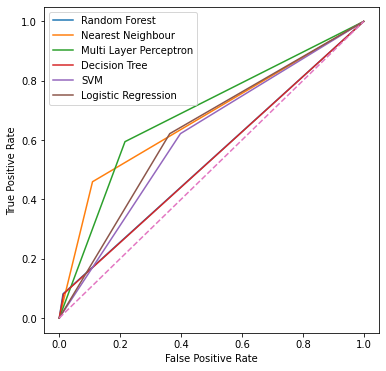

In [ ]:
# Criar taxas de falsos e verdadeiros positivos para cada modelo e o respetivo AUC
# Random Florest
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_pred_1)
auc_1 = metrics.roc_auc_score(y_test, y_pred_1)
# Vizinhos mais próximos
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_pred_2)
auc_2 = metrics.roc_auc_score(y_test, y_pred_2)
# Multi Layer Perceptron
false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(y_test, y_pred_3)
auc_3 = metrics.roc_auc_score(y_test, y_pred_3)
# Árvores de Decisão
false_positive_rate4, true_positive_rate4, threshold4 = roc_curve(y_test, y_pred_4)
auc_4 = metrics.roc_auc_score(y_test, y_pred_4)
# Máquinas de Vetores de Suporte
false_positive_rate5, true_positive_rate5, threshold5 = roc_curve(y_test, y_pred_5)
auc_5 = metrics.roc_auc_score(y_test, y_pred_5)
# Regressão Logística
false_positive_rate6, true_positive_rate6, threshold6 = roc_curve(y_test, y_pred_6)
auc_6 = metrics.roc_auc_score(y_test, y_pred_6)

#Plot da curva ROC
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(false_positive_rate1, true_positive_rate1, label='Random Forest')
ax.plot(false_positive_rate2, true_positive_rate2, label='Nearest Neighbour')
ax.plot(false_positive_rate3, true_positive_rate3, label='Multi Layer Perceptron')
ax.plot(false_positive_rate4, true_positive_rate4, label='Decision Tree')
ax.plot(false_positive_rate5, true_positive_rate5, label='SVM')
ax.plot(false_positive_rate6, true_positive_rate6, label='Logistic Regression')
plt.plot([0, 1], ls="--")
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend()

# Valores de AUC
print('Random Forest AUC          -> {}'.format(str(auc_1)))
print('Nearest Neighbour AUC      -> {}'.format(str(auc_2)))
print('Multi Layer Perceptron AUC -> {}'.format(str(auc_3)))
print('Decision Tree AUC          -> {}'.format(str(auc_4)))
print('SVM AUC                    -> {}'.format(str(auc_5)))
print('Logistic Regression AUC    -> {}'.format(str(auc_6)))
print('')